# Projeto 1

## Introdução

Este é um projeto da matéria de Ciência dos Dados do segundo semestre do curso de engenharia do INSPER.

Para esse projeto, foi usado o banco de dados da PNAD do ano de 2014 para analisar a diferença de um grupo de aposentdos com algum outro grupo da população (aposentados ou não). Neste caso, foi comparado a situação dos aposentados urbanos com os aposentados rurais, levando em consideração as seguintes variáveis:

>* Se a pessoa é ou não aposentada
>* Gênero
>* Cor ou Raça
>* Renda Percápita Domiciliar
>* Idade em que Começou a Trabalhar
>* Anos de ensino
>* Situação Economica

Vejamos a seguir como essas variaveis se relacionam e se há de fato uma diferença, seja ela benéfica ou prejudicial entre esses dois grupos de aposentados.

## Análise e Resultado

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [38]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\bruno\Downloads


In [39]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
dados = pd.read_csv("PES2014.csv", sep=",")

In [41]:
dados.Aposentados=dados[dados.V9122==2]

In [43]:
dados.Aposentados.insert(1,'regiao',0)

In [44]:
dados.Aposentados.head()

,Unnamed: 0,regiao,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
5,5,0,2014,11,15,3,1,4,5,1,...,1,724,3,2,2,NaN,NaN,2,724,20160623
11,11,0,2014,11,15,5,1,4,13,7,...,4,855,4,2,2,NaN,NaN,2,855,20160623
25,25,0,2014,11,15,10,1,2,15,10,...,2,2362,6,2,1,1,1,1,2362,20160623
26,26,0,2014,11,15,10,2,4,24,6,...,2,2362,6,5,2,NaN,NaN,2,2362,20160623
51,51,0,2014,11,23,1,5,2,25,1,...,5,444,3,1,2,NaN,NaN,2,444,20160623


In [45]:
dados.Aposentados.ix[(dados.Aposentados.V4728==4,'regiao')] = 'Rural'
dados.Aposentados.ix[(dados.Aposentados.V4728==5,'regiao')] = 'Rural'
dados.Aposentados.ix[(dados.Aposentados.V4728==6,'regiao')] = 'Rural'
dados.Aposentados.ix[(dados.Aposentados.V4728==7,'regiao')] = 'Rural'
dados.Aposentados.ix[(dados.Aposentados.V4728==8,'regiao')] = 'Rural'
dados.Aposentados.ix[(dados.Aposentados.V4728==1,'regiao')] = 'Urbana'
dados.Aposentados.ix[(dados.Aposentados.V4728==2,'regiao')] = 'Urbana'
dados.Aposentados.ix[(dados.Aposentados.V4728==3,'regiao')] = 'Urbana'

C:\Users\bruno\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
dados.Aposentados.head()
n=dados.Aposentados.shape[0]

## Análise censitária

In [47]:
ut1=dados.Aposentados.regiao.value_counts(True)
print(ut1)

Urbana    0.818622
Rural     0.181378
Name: regiao, dtype: float64


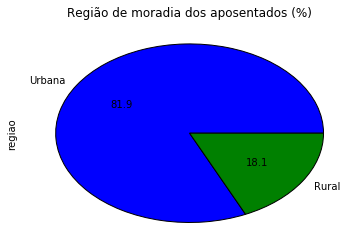

In [48]:
plot = ut1.plot(kind='pie',title='Região de moradia dos aposentados (%)',autopct='%.1f')

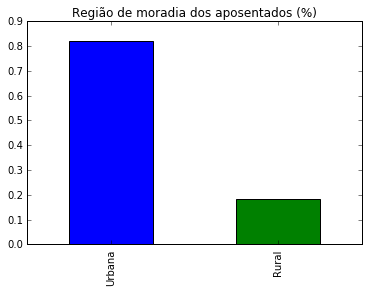

In [99]:
plot = ut1.plot(kind='bar',color=('b','g'),title='Região de moradia dos aposentados (%)')

### Conclusão 1

A maioria dos aposentados moram em regiões urbanas.

## Análise Geral do Amostra

C:\Users\bruno\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


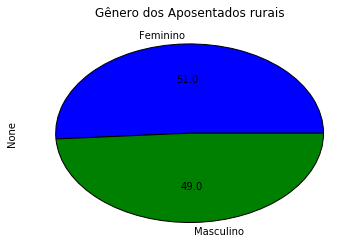

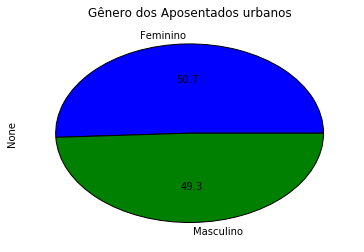

In [228]:
dados.Aposentados.V0302=dados.Aposentados.V0302.astype('category')
dados.Aposentados.V0302.cat.categories=(['Masculino','Feminino'])
generoRural=dados.Aposentados[dados.Aposentados.regiao=='Rural'].V0302.value_counts(True)
generoUrbano=dados.Aposentados[dados.Aposentados.regiao=='Urbana'].V0302.value_counts(True)
generoRural
plot=generoRural.plot(kind='pie',title='Gênero dos Aposentados rurais',autopct='%.1f')
plt.show()
plot1=generoUrbano.plot(kind='pie',title='Gênero dos Aposentados urbanos',autopct='%.1f')
plt.show()

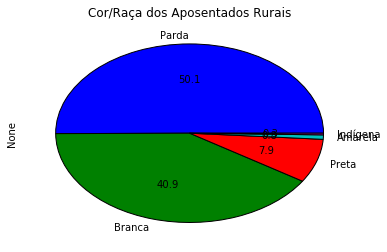

<function matplotlib.pyplot.show>

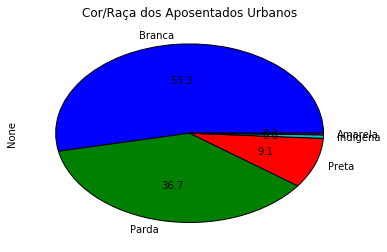

In [232]:
dados.Raca=dados.Aposentados.V0404.astype('category')
dados.Raca.cat.categories=(['Amarela','Branca','Preta','Indígena','Parda'])
ut4=dados.Raca[dados.Aposentados.regiao=='Rural'].value_counts(True)
ut5=dados.Raca[dados.Aposentados.regiao=='Urbana'].value_counts(True)
plot=ut4.plot(kind='pie',title='Cor/Raça dos Aposentados Rurais',autopct='%.1f')
plt.show()
plot=ut5.plot(kind='pie',title='Cor/Raça dos Aposentados Urbanos',autopct='%.1f')
plt.show

### Conclusão 3

Não há muita diferênça entre as frequencias relativas de cor/raça dos aposentados urbanos e rurais.

## Análise de Renda Percapita Domiciliar

In [96]:
dados.Aposentados[dados.Aposentados.V4742!=999999999999].V4742.describe()

count     36865.000000
mean       1511.968941
std        2726.723328
min          80.000000
25%         713.000000
50%         874.000000
75%        1500.000000
max      331200.000000
Name: V4742, dtype: float64

In [309]:
faixa=(0,100,300,600,1000,2000,5000,10000,20000,50000,100000,200000,300000,400000)

dados.renda=pd.cut(dados.Aposentados.V4742,faixa)
ut2=dados.renda.value_counts()

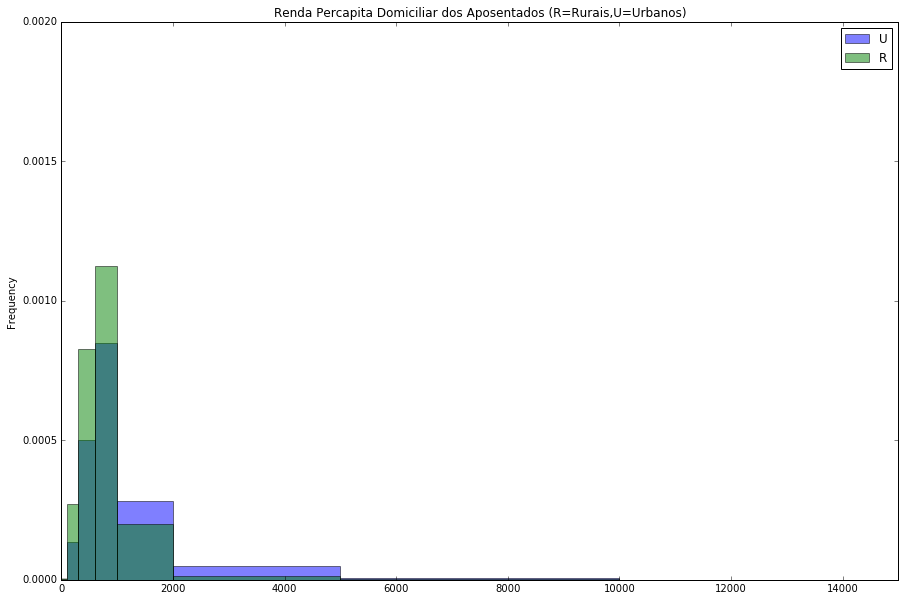

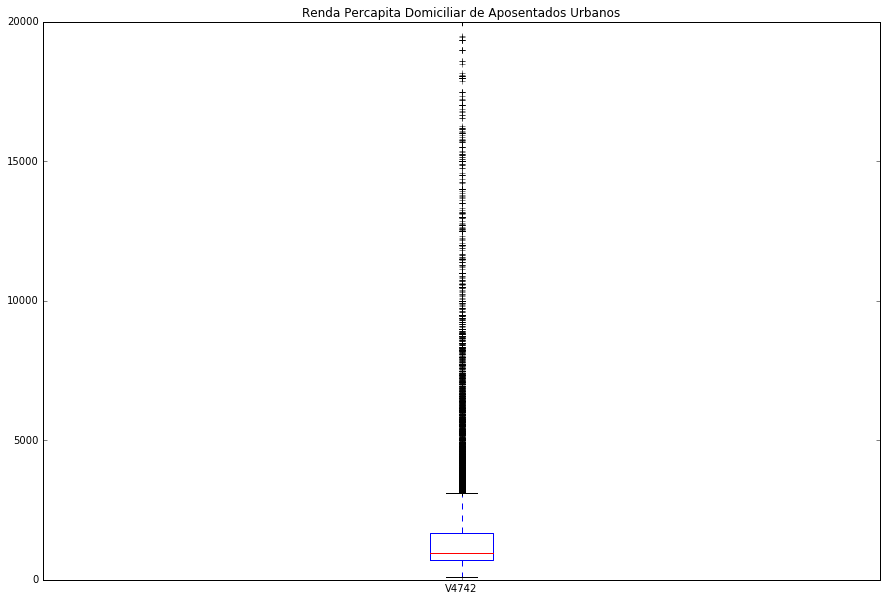

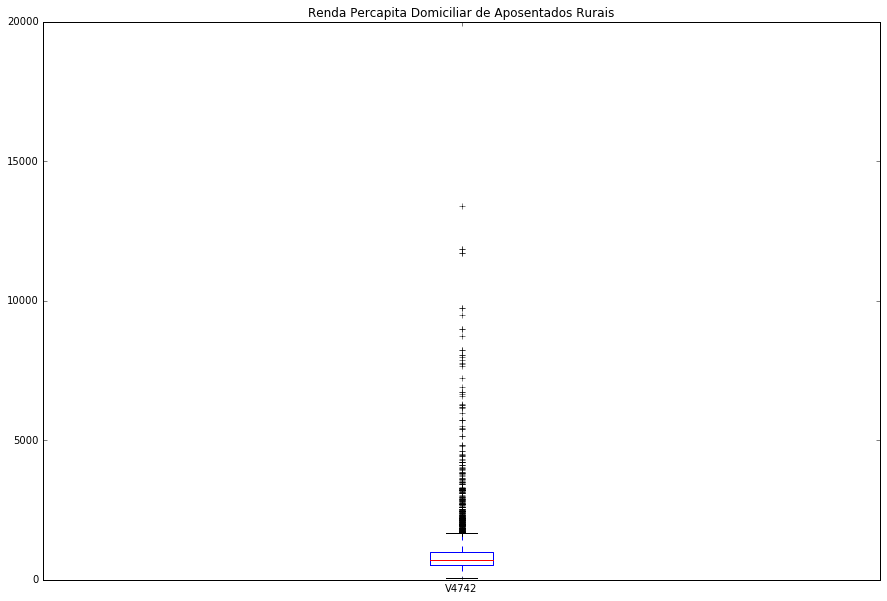

In [98]:
plot=dados.Aposentados[(dados.Aposentados.V4742!=999999999999) & (dados.Aposentados.regiao=='Urbana')].V4742.plot(legend=True,kind='hist',bins=faixa,figsize=(15,10),normed=1,alpha=0.5)
plot1=dados.Aposentados[(dados.Aposentados.V4742!=999999999999) & (dados.Aposentados.regiao=='Rural')].V4742.plot(legend=True,kind='hist',title='Renda Percapita Domiciliar dos Aposentados (R=Rurais,U=Urbanos)',bins=faixa,figsize=(15,10),normed=1,alpha=0.5)
plt.legend('UR')
plt.axis([0,15000,0,0.0020])
plt.show()

plot2=dados.Aposentados[(dados.Aposentados.V4742!=999999999999) & (dados.Aposentados.regiao=='Urbana')].V4742.plot(kind='box',title='Renda Percapita Domiciliar de Aposentados Urbanos',figsize=(15,10))
plt.axis([0,2,0,20000])
plt.show()

plot3=dados.Aposentados[(dados.Aposentados.V4742!=999999999999) & (dados.Aposentados.regiao=='Rural')].V4742.plot(kind='box',title='Renda Percapita Domiciliar de Aposentados Rurais',figsize=(15,10))
plt.axis([0,2,0,20000])
plt.show()

### Conclusão 4

Levando em considerção a frequência relativa das rendas percapita domiciliares dos aposentados urbanos e rurais, pode-se dizer que aqueles que moram em regiões urbanas têm, de modo geral, uma renda superior àqueles que moram em zonas rurais. 

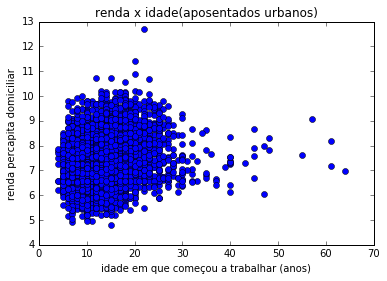

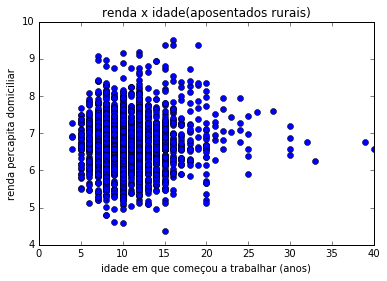

In [237]:
plt.plot(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Urbana')].V9892,np.log(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Urbana')].V4742),'o')

plt.title('renda x idade(aposentados urbanos)')
plt.xlabel('idade em que começou a trabalhar (anos)')
plt.ylabel('renda percapita domiciliar')
plt.show()

plt.plot(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Rural')].V9892,np.log(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Rural')].V4742),'o')

plt.title('renda x idade(aposentados rurais)')
plt.xlabel('idade em que começou a trabalhar (anos)')
plt.ylabel('renda percapita domiciliar')
plt.show()

In [236]:
print('Correlção da renda percapita domiciliar com a idade em que começou a trabalhar dos aposentados Urbanos')
corr1 = dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Urbana')].V9892.corr(np.log(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Urbana')].V4742))
print(corr1)

print('Correlção da renda percapita domiciliar com a idade em que começou atrabalhar dos aposentados Rural')
corr2 = dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Rural')].V9892.corr(np.log(dados.Aposentados[(dados.Aposentados.V4742!=999999999999)&(dados.Aposentados.regiao=='Rural')].V4742))
print(corr2)

Correlção da renda percapita domiciliar com a idade em que começou a trabalhar dos aposentados Urbanos
0.2747956024
Correlção da renda percapita domiciliar com a idade em que começou atrabalhar dos aposentados Rural
0.049115566244


### Conclusão 5

Após observar a correlação entre a idade em que os aposentados começaram a trabalhar com a renda percápita domiciliar, pode-se afirmar que os aposentados que moram em regiões urbanas tendem a ter uma renda domiciliar maior se começarem a trabalhar mais tarde, enquanto os que moram em regiões rurais nao dependem muito desse fator para determinar sua renda. 

Vejamos se agora qual o motivo de tal relação.

## Análise de Nível de Ensino

In [208]:
#Função que divide cada valor da tabela cruzada pelo total da última linha (quando axis=0) ou da última coluna (quando axis=1)
#Retorna tabela cruzada com valores sem casa decimais
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=2)

In [211]:
faixa=(0,1,3,6,11,15,16)
dados.Nensino=pd.cut(dados.Aposentados.V4803,faixa)
dados.Nensino.cat.categories=(['Menos de 1 ano de instrução',
                               '1 a 2 anos',
                               '3 a 5 anos',
                               '6 a 10 anos',
                               '11 a 14 anos',
                               'mais de 15 anos'])

ct1=pd.crosstab(dados.Aposentados.regiao,dados.Nensino,margins=True).apply(percConvert, axis=1)
ct1

V4803,Menos de 1 ano de instrução,1 a 2 anos,3 a 5 anos,6 a 10 anos,11 a 14 anos,mais de 15 anos,All
regiao,,,,,,,
Rural,45.94,14.17,29.18,6.15,3.08,1.34,100
Urbana,20.89,8.12,27.47,14.03,17.39,12.05,100
All,25.43,9.22,27.78,12.60,14.80,10.11,100


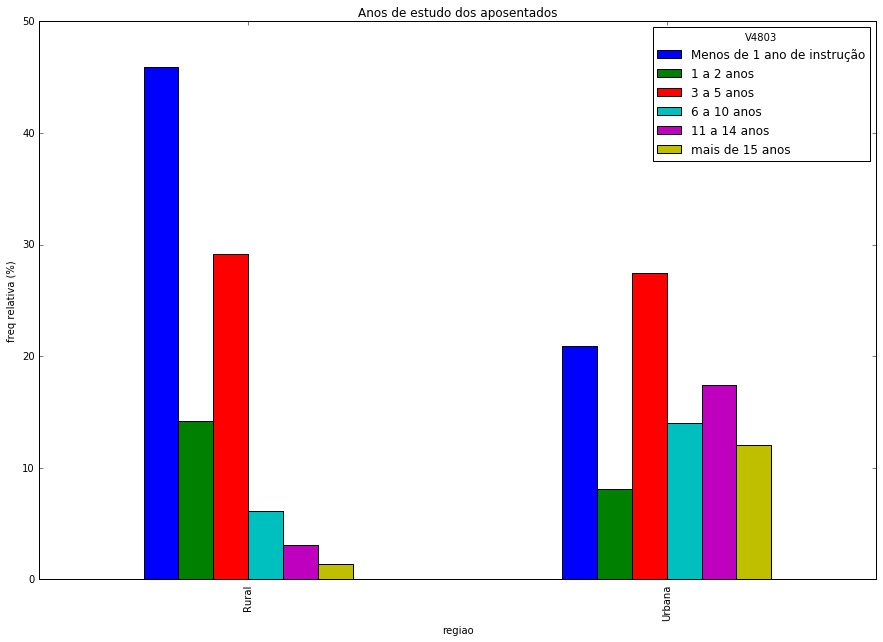

In [308]:
ct1=ct1.iloc[(0,1),(0,1,2,3,4,5)]
plot=ct1.plot(kind='bar',figsize=(15,10))
plt.title('Anos de estudo dos aposentados')
plt.ylabel('freq relativa (%)')

### Conclusão 6

De acordo com o gráfico acima, os aposentados de regiões urbanas são consideravelmente mais escolarizados do que os de regiões rurais. Esse é um dos motivos pelo qual a correlação entre renda e idade em que começou a trabalhar dos aposentados urbanos é maior do que os rurais.

## Condição de atividade ( economicamente ativo ou não)

In [274]:
dados.Ativos=dados.Aposentados.V4704.astype('category')
dados.Ativos.cat.categories = (['Econ. ativas','Não Econ. ativas'])
ct2 = pd.crosstab(dados.Aposentados.regiao,dados.Ativos,margins=True).apply(percConvert, axis=1)
print(ct2)
ct2=ct2.iloc[(0,1,2),(0,1)]

V4704   Econ. ativas  Não Econ. ativas  All
regiao                                     
Rural          48.92             51.08  100
Urbana         21.87             78.13  100
All            26.78             73.22  100


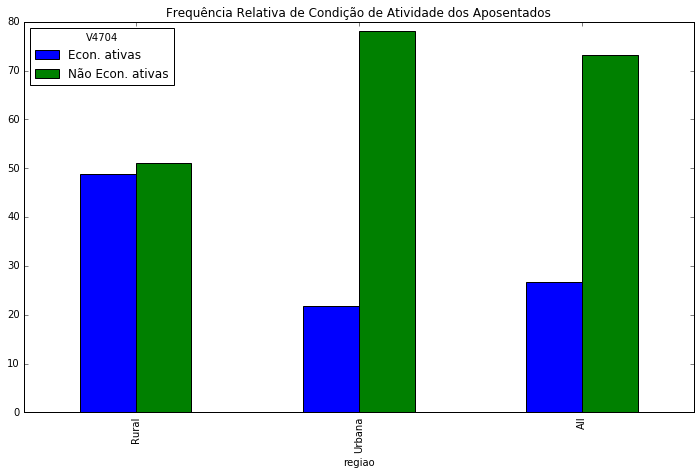

In [275]:
plot=ct2.plot(kind='bar',figsize=(12,7))
plt.title('Frequência Relativa de Condição de Atividade dos Aposentados')

### Conclusão 7 

* A grande maioria dos aposentados não são economicamente ativos.
* Os aposentados rurais são mais economicamente ativos, do que os aposentados urbanos.

## Análise de Carga Horària de Trabalho Semanal

In [299]:
dados.Htrab=dados.Aposentados.V4707.astype('category')
dados.Htrab.cat.categories = (['Até 14 hrs','15 a 39 hrs','40 a 44 hrs','45 a 48 hrs','mais de 49 hrs'])
ct3=pd.crosstab(dados.Aposentados.regiao,dados.Htrab,margins=True).apply(percConvert,axis=1)
ct3= ct3.iloc[(0,1,2),(0,1,2,3,4)]

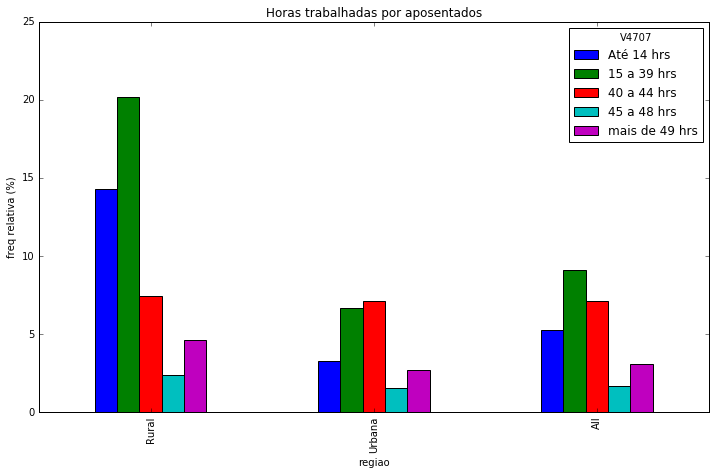

In [306]:
plot=ct3.plot(kind='bar',figsize=(12,7))
plt.title('Horas trabalhadas por aposentados')
plt.ylabel('freq relativa (%)')

### Conclusão 8

Os aposentados rurais trabalham mais tempo do que os urbanos.

## Análise de alfabetização

In [301]:
dados.Ler=dados.Aposentados.V0601.astype('category')
dados.Ler.cat.categories = (['sabe ler','não Sabe ler'])
ct4 = pd.crosstab(dados.Aposentados.regiao,dados.Ler,margins=True).apply(percConvert,axis=1)
ct4 = ct4.iloc[(0,1,2),(0,1)]

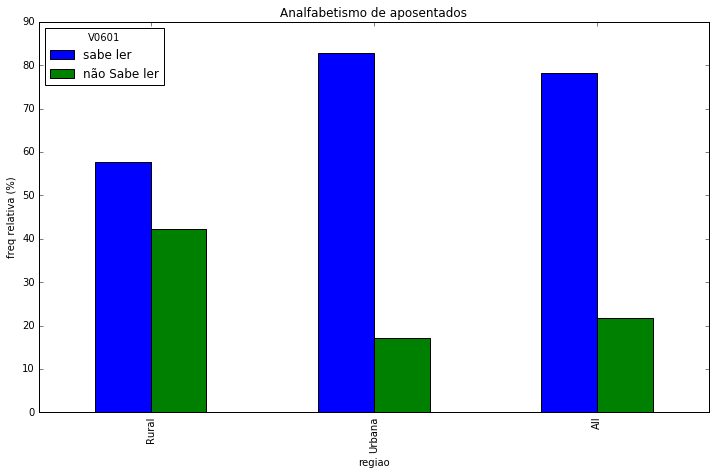

In [307]:
plot=ct4.plot(kind='bar',figsize=(12,7))
plt.title('Analfabetismo de aposentados')
plt.ylabel('freq relativa (%)')

### Conclusão 9

Há mais aposentados rurais analfabetos.

## Conclusão final:

Após todas as análises e comparações feitas ao longo do projeto, é possível concluir que:

* A maioria dos aposentados vive em região urbana.
* Não há muita diferença estrutural (gênero, cor, etc.) entre os aposentados rurais e urbanos.
* Apesar da maioria dos aposentados estarem na mesma faixa de renda percápita domiciliar, aqueles que moram em regiões urbanas tem uma renda mais alta.
* Os aposentados urbanos têm um nível de escolaridade superior aos rurais.
* Há mais aposentados rurais analfabetos do que urbanos.
* Os aposentados rurais trabalham mais tempo do que os urbanos.
* O nível de escolaridade influencia na renda dos aposentados urbanos.

Para finalizar o projeto, vamos responder a seguinte pergunta: "É possível afirmar que os aposentados urbanos estão em melhor situação do que os rurais?" 

resposta:
Juntando uma serie de fatores, como renda, escolaridade, horas de trabalho, índice de analfabetismo, entre outros, observa-se que, de forma geral os aposentados que moram em regiões urbanas se encontram em melhores situações do que aqueles que moram em regiões rurais.